# Logistic regression model using text data vectorized with word2vec


In [53]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [54]:
#import data

%store -r x_text_train_wv_2d
%store -r x_text_test_wv_2d
%store -r y_text_train_wv
%store -r y_text_test_wv

In [55]:
#rename variables for ease of use

x_train =  x_text_train_wv_2d
x_test =  x_text_test_wv_2d
y_train = y_text_train_wv
y_test = y_text_test_wv

In [56]:
#define model

lr = LogisticRegression()

In [57]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [58]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [59]:
#cross validate on training set to check model stability

cv_scores_w2v_text_lr = cross_validate(lr, x_train, y_train, cv = k_folds, scoring=scorer)

In [60]:
#check cross validation scores

cv_scores_w2v_text_lr

{'fit_time': array([1.50697112, 1.4062438 , 1.36734009, 1.44513822, 1.31049585]),
 'score_time': array([0.04787207, 0.03889203, 0.03789663, 0.03690362, 0.04388404]),
 'test_accuracy': array([0.83447182, 0.83788729, 0.8383555 , 0.83396365, 0.82591192]),
 'test_precision': array([0.82829435, 0.8286944 , 0.82699943, 0.82678723, 0.80560224]),
 'test_recall': array([0.79365947, 0.79779006, 0.80308455, 0.79640719, 0.79689665]),
 'test_f1_score': array([0.81060712, 0.81294863, 0.81486656, 0.81131291, 0.8012258 ])}

In [61]:
#fit model on the whole training set
start = process_time()

lr.fit(x_train, y_train)

end=process_time()

In [62]:
#test model on test set

y_pred = lr.predict(x_test)

In [63]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      9879
           1       0.81      0.82      0.82      7688

    accuracy                           0.84     17567
   macro avg       0.83      0.84      0.83     17567
weighted avg       0.84      0.84      0.84     17567



In [64]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Logistic Regression model model with Text Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

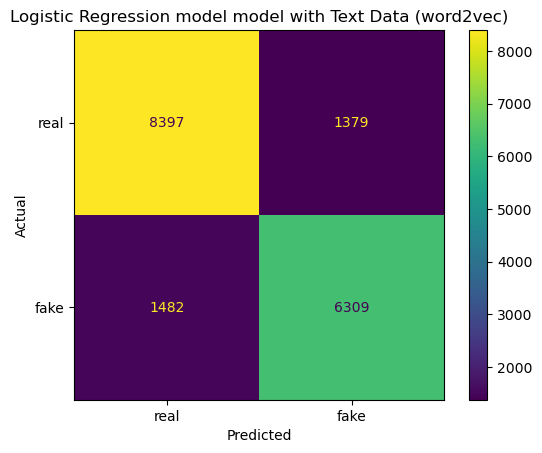

In [65]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Logistic Regression model model with Text Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [66]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [49]:
dict = {'data type': 'text',
        'model type':'logistic regression',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [67]:
w2v_text_lr=pd.DataFrame.from_dict([dict])

In [68]:
w2v_text_lr

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,logistic regression,word2vec,0.837138,0.82063,0.809781,0.815169,3.484375


In [69]:
#save results for later use

%store w2v_text_lr

Stored 'w2v_text_lr' (DataFrame)
